In [18]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
y_path = "../data/raw/HP+mosaic+rand_image64+10+500_size8x8_alternate_200x20020240618_collect.npz"
x_path = "../data/raw/HP_mosaic_random_size8x8_image64+10+500_alternate.npz"

In [14]:
y_data = np.load(y_path)["arr_0"]
x_data = np.load(x_path)["arr_0"]

In [15]:
y_data.shape, x_data.shape

((1148, 1000), (1148, 64))

In [16]:
Y_data = y_data[:, ::2]

In [17]:
Y_data.shape, x_data.shape

((1148, 500), (1148, 64))

In [20]:
x_hadamard, Y_hadamard = x_data[:128, :], Y_data[:128, :]
x_mnist, Y_mnist = x_data[128:148, :], Y_data[128:148, :]
x_random, Y_random = x_data[148:, :], Y_data[148:, :]

x_hadamard_1 = x_hadamard[0::2, :]
x_hadamard_2 = x_hadamard[1::2, :]
Y_hadamard_1 = Y_hadamard[0::2, :]
Y_hadamard_2 = Y_hadamard[1::2, :]

x_mnist_1 = x_mnist[0::2, :]
x_mnist_2 = x_mnist[1::2, :]
Y_mnist_1 = Y_mnist[0::2, :]
Y_mnist_2 = Y_mnist[1::2, :]

x_random_1 = x_random[0::2, :]
x_random_2 = x_random[1::2, :]
Y_random_1 = Y_random[0::2, :]
Y_random_2 = Y_random[1::2, :]

In [21]:
x_hadamard_all = x_hadamard_1 - x_hadamard_2
Y_hadamard_all = Y_hadamard_1 - Y_hadamard_2
x_mnist_all = x_mnist_1 - x_mnist_2
Y_mnist_all = Y_mnist_1 - Y_mnist_2
x_random_all = x_random_1 - x_random_2
Y_random_all = Y_random_1 - Y_random_2

In [22]:
x_hadamard_all.shape, Y_hadamard_all.shape, x_mnist_all.shape, Y_mnist_all.shape, x_random_all.shape, Y_random_all.shape

((64, 64), (64, 500), (10, 64), (10, 500), (500, 64), (500, 500))

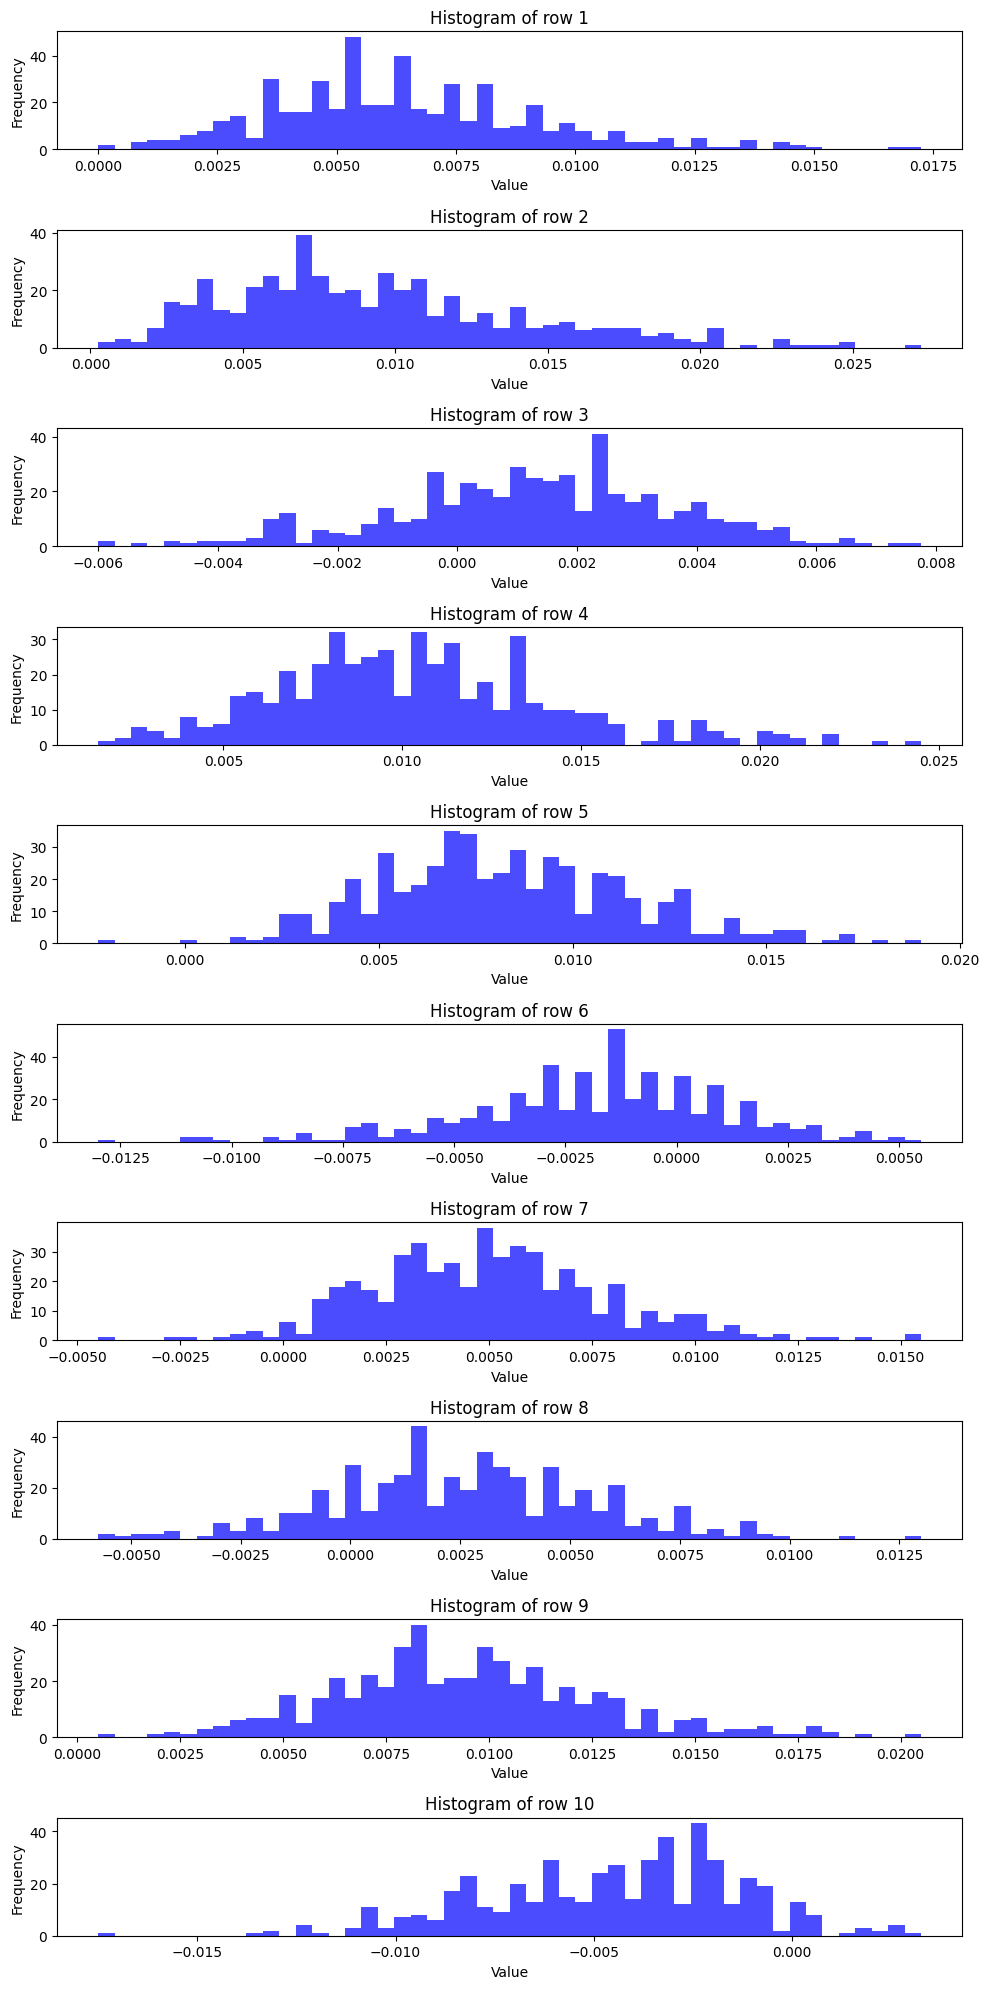

In [38]:
# 例として最初の画像のヒストグラムを表示
# ヒストグラムを表示するためのサブプロットの設定
fig, axes = plt.subplots(10, 1, figsize=(10, 20), tight_layout=True)

# 各行のデータに対してヒストグラムを描画
for i in range(10):
    axes[i].xlim = (-1, 1)
    axes[i].hist(Y_mnist_all[i], bins=50, color='blue', alpha=0.7)
    axes[i].set_title(f'Histogram of row {i + 1}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    
plt.show()

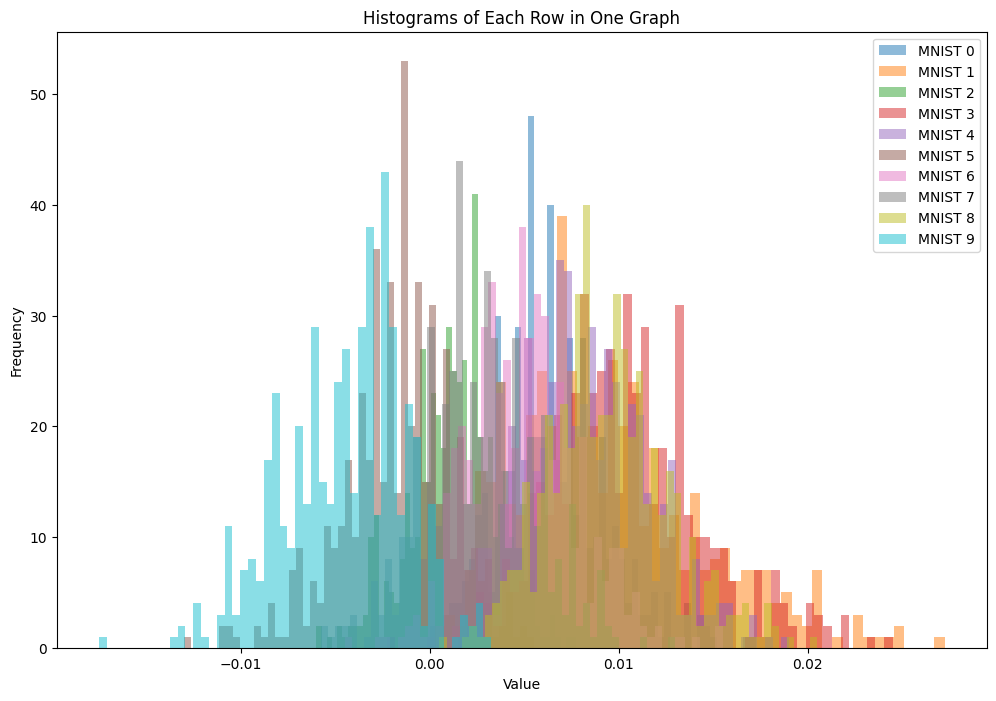

In [35]:
# ヒストグラムを描画するための色を設定
colors = plt.cm.tab10.colors  # 10種類の異なる色を取得
colors = list(colors)
# 1つのグラフに複数のヒストグラムを描画
plt.figure(figsize=(12, 8))

for i in range(10):
    plt.hist(Y_mnist_all[i], bins=50, color=colors[i], alpha=0.5, label=f'MNIST {i}')

plt.title('Histograms of Each Row in One Graph')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()